In [5]:
! pip list --outdated

Package           Version  Latest   Type
----------------- -------- -------- -----
argon2-cffi       21.1.0   21.3.0   wheel
attrs             21.2.0   21.4.0   wheel
comtypes          1.1.7    1.1.10   sdist
cycler            0.10.0   0.11.0   wheel
decorator         5.1.0    5.1.1    wheel
fonttools         4.28.5   4.29.0   wheel
imageio           2.9.0    2.14.1   wheel
ipykernel         6.5.1    6.7.0    wheel
ipython           7.30.0   8.0.1    wheel
joblib            0.17.0   1.1.0    wheel
jsonschema        4.2.1    4.4.0    wheel
jupyter-client    7.1.0    7.1.2    wheel
kiwisolver        1.2.0    1.3.2    wheel
mistune           0.8.4    2.0.2    wheel
nbclient          0.5.9    0.5.10   wheel
nbconvert         6.3.0    6.4.0    wheel
nest-asyncio      1.5.1    1.5.4    wheel
notebook          6.4.6    6.4.8    wheel
numpy             1.21.4   1.22.1   wheel
opencv-python     4.4.0.40 4.5.5.62 wheel
pandas            1.3.5    1.4.0    wheel
parso             0.8.2    0.8.3   

In [6]:
! pip install -U pandas

  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [7]:
import matplotlib                   #追加   ### fig:add_animation_module (1〜3行目) 
matplotlib.use('nbagg')             #追加 
import matplotlib.animation as anm  #追加
import matplotlib.pyplot as plt
import math
import matplotlib.patches as patches
import numpy as np

In [8]:
class World:                          ### fig:animation_prepare
    def __init__(self, debug=False): #デバッグ用のフラグを追加
        self.objects = [] 
        self.debug = debug #追加
        
    def append(self,obj): 
        self.objects.append(obj)
    
    def draw(self):
        fig = plt.figure(figsize=(5,5))     #10〜16行目はそのまま
        ax = fig.add_subplot(111)
        ax.set_aspect('equal')
        ax.set_xlim(-5,5)
        ax.set_ylim(-5,5)
        ax.set_xlabel("X",fontsize=10)
        ax.set_ylabel("Y",fontsize=10)
        
        elems = []
        
        if self.debug:        
            for i in range(1000): self.one_step(i, elems, ax) #デバッグ時はアニメーションさせない
        else:
            self.ani = anm.FuncAnimation(fig, self.one_step, fargs=(elems, ax), frames=10, interval=1000, repeat=False)    
        plt.show()
        
    def one_step(self, i, elems, ax):
        pass

In [9]:
class IdealRobot:
    def __init__(self, pose, color="black"):
        self.pose = pose        # 引数から姿勢の初期値を設定
        self.r = 0.2            # これは描画のためなので固定値
        self.color = color      # 引数から描画するときの色を設定
    
    def draw(self, ax):
        x, y, theta = self.pose                   # 姿勢の変数を分解して3つの変数へ
        xn = x + self.r * math.cos(theta)         #  ロボットの鼻先のx座標 
        yn = y + self.r * math.sin(theta)         #  ロボットの鼻先のy座標 
        ax.plot([x,xn], [y,yn], color=self.color) # ロボットの向きを示す線分の描画
        c = patches.Circle(xy=(x, y), radius=self.r, fill=False, color=self.color) 
        ax.add_patch(c)   # 上のpatches.Circleでロボットの胴体を示す円を作ってサブプロットへ登録

<IPython.core.display.Javascript object>


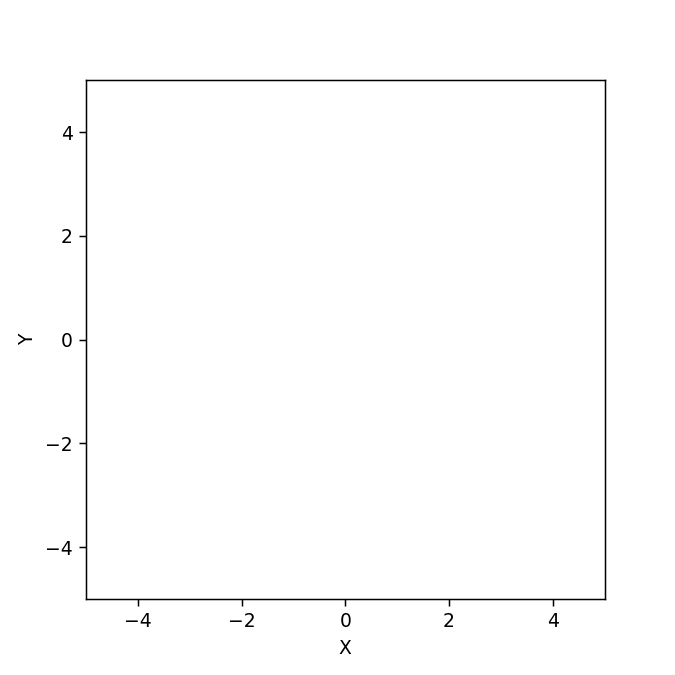

In [11]:
world = World(debug=False)

robot1 = IdealRobot( np.array([2, 3, math.pi/6]).T )           # ロボットのインスタンス生成（色を省略）
robot2 = IdealRobot( np.array([-2, -1, math.pi/5*6]).T, "red")  # ロボットのインスタンス生成（色を指定）
world.append(robot1)                                      # ロボットを登録 
world.append(robot2)
world.draw()